# TD3 SVM

## Load data

In [1]:
import numpy as np
data = np.load("15_scenes_Xy.npz", "rb")

## Split data Train/Validation/Test

In [2]:
from sklearn.model_selection import train_test_split

test_size = 0.2
validation_size = 0.1 


X_train, X_test, y_train, y_test = train_test_split(data["X"], data["y"], test_size=test_size)

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size/(1-test_size))

## SVM

In [3]:
from sklearn.svm import SVC as svm

cs = [0.1, 1, 10, 100, 1000]
clf = {}

for c in cs:
    clf[c] = svm(C=c, gamma="auto")
    clf[c].fit(X_train, y_train)

In [12]:
scores = np.zeros(len(cs))

for i in range(len(cs)):
    scores[i] = clf[cs[i]].score(X_validation, y_validation)


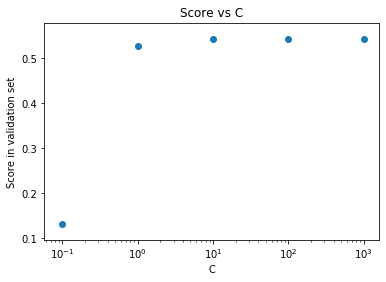

In [15]:
import matplotlib.pyplot as plt
plt.scatter(cs, scores)
plt.title('Score vs C')
plt.xlabel('C')
plt.ylabel('Score in validation set')
plt.xscale('log')
plt.show()